# Implementing univariate linear regression
##### 1) Cost function
##### 2) calculating the hypothesis coefficients
##### 3) scoring the trained algorithm using coefficient of determination

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
class uni_LR:
    
    #constructor
    def __init__(self):
        self.slope=0
        self.intercept=0
    
    def train(self, arr1, arr2):
        if(len(arr1)!=len(arr2)):
            print("target array and input parameter array are of different shape.")
            return
        
        self.np_x=np.array(arr1, dtype=float)
        self.np_y=np.array(arr2, dtype=float)
        k=len(self.np_x)#total number of datapoints
        np_x2=(self.np_x)**2
        np_xy=(self.np_x)*(self.np_y)
        x_sum=np.sum(self.np_x)
        y_sum=np.sum(self.np_y)
        x2_sum=np.sum(np_x2)
        xy_sum=np.sum(np_xy)
        
        #calculating the slope and the intercept for the hypothesis
        self.slope=(((x_sum)*(y_sum))-(k*(xy_sum)))/(((x_sum)**2)-(k*x2_sum))
        self.intercept=(y_sum-self.slope*x_sum)/k
        
    def predict(self, arr1):
        np_test=np.array(arr1, dtype=float)
        np_predict=(self.slope)*np_test+self.intercept
        return np_predict
    
    def score(self, arr1, arr2):
        #arr1 is the testing array to predict the coeff of determination
        #arr2 is the correct data output of arr1
        if(self.slope==0 or self.intercept==0):
            print("train the algorithm first.")
            return
        np_predict=self.predict(arr1)
        np_target=np.array(arr2,dtype=float)
        mean=np.mean(np_target)
        
        worse_case=np.sum((np_target-mean)**2)
        np_error=np.sum((np_target-np_predict)**2)
        
        COD=1-(np_error/worse_case)
        return COD        

In [3]:
#dataset taken from kaggle
df=pd.read_csv('univariate_house_prices_dataset.csv')
np_area=np.array(list(df['area']), dtype=float)
np_price=np.array(list(df['price']), dtype=float)

In [4]:
area_train, area_test, price_train, price_test=model_selection.train_test_split(np_area, np_price)

In [5]:
algo1=uni_LR()
algo1.train(area_train, price_train)
#predicting the values of previously unknown data
price_predict=algo1.predict(area_test)

In [9]:
print(algo1.score(area_train, price_train))
print(algo1.slope)
print(algo1.intercept)

0.9999992025106059
250.00265279408453
985.6619777633747


In [7]:
import matplotlib.pyplot as plt

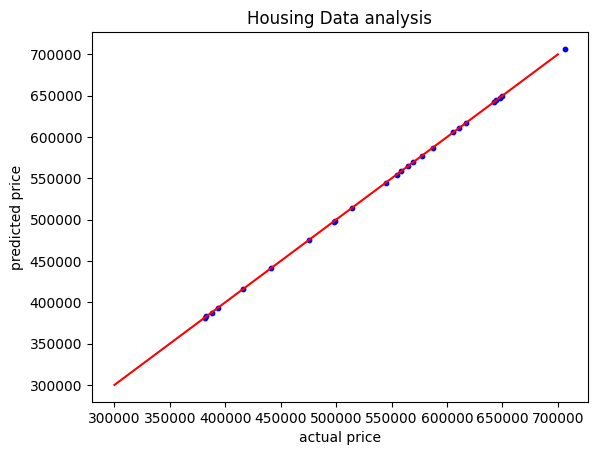

In [20]:
plt.plot([300000,700000], [300000,700000], 'r-')
plt.scatter(price_test, price_predict, s=10, c='b')
plt.title("Housing Data analysis")
plt.ylabel("predicted price")
plt.xlabel("actual price")
plt.show()
